In [1]:
from goes2go import GOES

sat_east = GOES(satellite=16, product="ABI", domain="C")
sat_west = GOES(satellite=18, product="ABI", domain="C")

/Users/tanaynistala/Developer/Turbulence/.venv/lib/python3.13/site-packages/goes2go/data.py:665: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),
/Users/tanaynistala/Developer/Turbulence/.venv/lib/python3.13/site-packages/goes2go/NEW.py:188: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  within=pd.to_timedelta(config["nearesttime"].get("within", "1h")),


In [2]:
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from goes2go.tools import abi_crs

projection = ccrs.AlbersEqualArea(
    central_longitude=-96,
    central_latitude=37.5,
    standard_parallels=(29.5, 45.5)
)

 👮🏻‍♂️ File already exists. Do not overwrite: /Users/tanaynistala/data/noaa-goes18/ABI-L2-MCMIPC/2024/340/23/OR_ABI-L2-MCMIPC-M6_G18_s20243402356187_e20243402358565_c20243402359081.nc
📦 Finished downloading [1] files to [/Users/tanaynistala/data/noaa-goes18/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

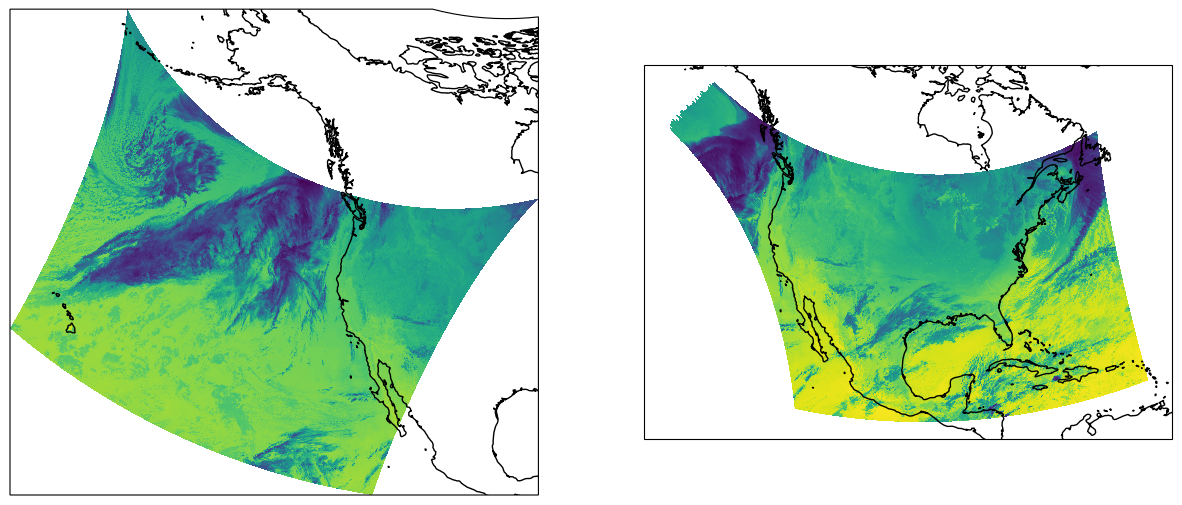

In [3]:
fig = plt.figure(figsize=(15, 12))
ax_west = fig.add_subplot(1, 2, 1, projection=projection)
ax_east = fig.add_subplot(1, 2, 2, projection=projection)

for (ax, sat) in zip([ax_west, ax_east], [sat_west, sat_east]):
    data = sat.nearesttime("2024-12-05 00:00:00")
    crs, x, y = abi_crs(data, reference_variable="CMI_C13")

    ax.coastlines(resolution="50m")
    ax.pcolormesh(x, y, data["CMI_C13"], transform=crs)

plt.show()

 👮🏻‍♂️ File already exists. Do not overwrite: /Users/tanaynistala/data/noaa-goes18/ABI-L2-MCMIPC/2024/312/00/OR_ABI-L2-MCMIPC-M6_G18_s20243120001185_e20243120003570_c20243120004082.nc
📦 Finished downloading [1] files to [/Users/tanaynistala/data/noaa-goes18/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

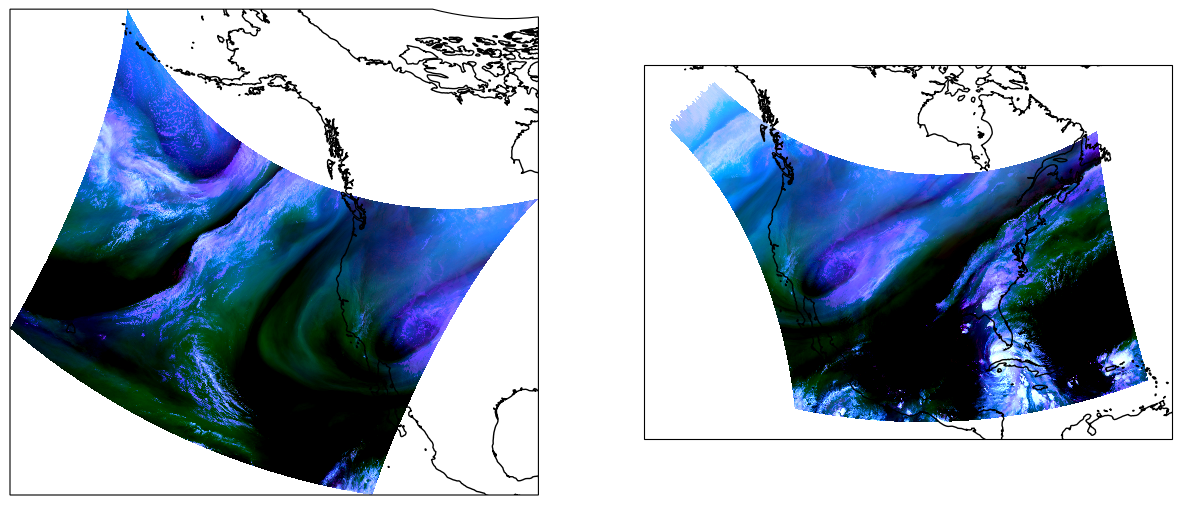

In [4]:
fig = plt.figure(figsize=(15, 12))
ax_west = fig.add_subplot(1, 2, 1, projection=projection)
ax_east = fig.add_subplot(1, 2, 2, projection=projection)

for (ax, sat) in zip([ax_west, ax_east], [sat_west, sat_east]):
    data = sat.nearesttime("2024-11-06 23:59:00")
    crs, x, y = abi_crs(data, reference_variable="CMI_C13")

    ax.coastlines(resolution="50m")
    ax.pcolormesh(x, y, data.rgb.WaterVapor(), transform=crs)

plt.show()